In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import integrate

import astropy.units as u
import astropy.coordinates as apycoords

In [6]:
data = pd.read_csv('./Field_data/beehive_dbscan.csv')
data['parallax'] = data['parallax']/1000
data['parallax_error'] = data['parallax_error']/1000
data

,Unnamed: 0,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,...,rp_error,bp,bp_error,visibility_periods_used,astrometric_excess_noise,ruwe,phot_bp_rp_excess_factor,dr2_radial_velocity,dr2_radial_velocity_error,Clusters
0,39792,130.633397,0.025330,18.591061,0.012327,0.005411,0.000030,-35.895765,0.031063,-11.856119,...,19.910430,16.252836,11.972886,19,0.000000,1.030550,1.372809,0.000000,0.000000,116
1,41452,130.384641,0.061870,18.669593,0.029086,0.005436,0.000078,-36.226625,0.083027,-12.279672,...,9.826612,18.085545,7.015597,17,0.000000,0.990238,1.439782,0.000000,0.000000,116
2,41560,130.398544,0.051099,18.742996,0.022478,0.005390,0.000069,-36.278669,0.072786,-11.944347,...,20.646866,17.365757,12.607851,16,0.103990,1.048471,1.432785,0.000000,0.000000,116
3,41889,130.221747,0.118358,18.748255,0.068531,0.005413,0.000152,-36.377208,0.148201,-12.769928,...,12.166533,19.585491,9.857786,17,0.046033,1.031413,1.509467,0.000000,0.000000,116
4,41975,130.377773,0.016995,18.871813,0.007899,0.005468,0.000022,-36.281232,0.021683,-12.128798,...,862.376600,13.044775,621.192930,17,0.080712,1.106098,1.252078,25.150738,10.159041,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,180669,130.521415,0.027106,20.965652,0.012741,0.005395,0.000030,-35.932542,0.033204,-13.449791,...,26.055037,16.265833,10.254701,18,0.052512,1.091374,1.402948,0.000000,0.000000,116
307,180827,129.691939,0.012945,20.576714,0.009074,0.005363,0.000015,-35.549713,0.015367,-13.445146,...,244.045850,12.629104,220.498300,17,0.052848,0.939541,1.217576,36.041595,1.497840,116
308,180854,129.690202,0.091779,20.662157,0.065413,0.005418,0.000107,-35.751180,0.110622,-13.136184,...,13.487704,19.266266,15.914566,17,0.000000,1.016400,1.478578,0.000000,0.000000,116
309,180965,129.825049,0.032235,20.739209,0.021457,0.005433,0.000037,-35.768350,0.038321,-12.898645,...,25.909159,16.644695,14.848689,17,0.000000,1.030129,1.387309,0.000000,0.000000,116


In [7]:
ra = data['ra'] *u.deg
dec = data['dec'] *u.deg
distance = 1/data['parallax'] *u.pc

c = apycoords.SkyCoord(ra=ra,dec=dec,distance=distance,frame='icrs')
#print("(X,Y,Z) in (kpc,kpc,kpc)")
#print("\t",c.galactic.cartesian)
xm = c.galactic.cartesian.x
ym = c.galactic.cartesian.y
zm = c.galactic.cartesian.z

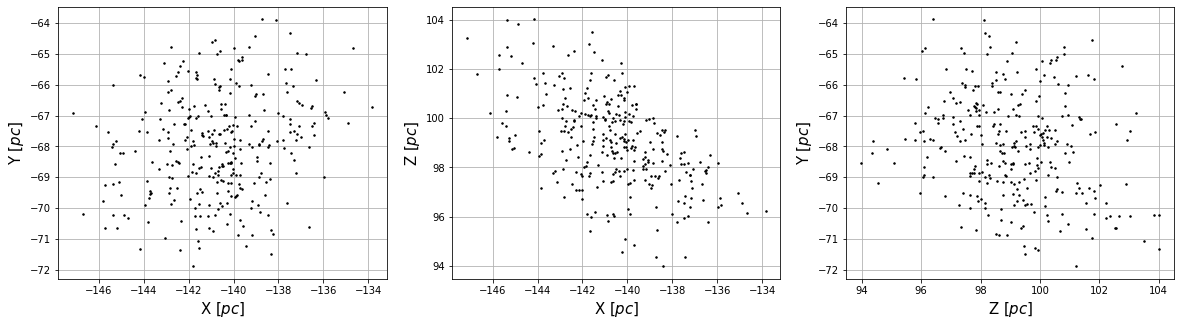

In [8]:
#xm = (1/data['parallax']) * np.cos(np.radians(data['ra'])) * np.cos(np.radians(data['dec'])) #/1000
#ym = (1/data['parallax']) * np.sin(np.radians(data['ra'])) * np.cos(np.radians(data['dec'])) #/1000
#zm = (1/data['parallax']) * np.sin(np.radians(data['dec'])) #/1000

%matplotlib inline
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot(xm, ym,color='black',marker='.',linestyle='None',markersize=3,alpha=1)
plt.xlabel("X $[pc]$", fontsize = 15)
plt.ylabel("Y $[pc]$", fontsize = 15)#,rotation=0)
plt.grid()

plt.subplot(1,3,2)
plt.plot(xm, zm,color='black',marker='.',linestyle='None',markersize=3,alpha=1)
plt.xlabel("X $[pc]$", fontsize = 15)
plt.ylabel("Z $[pc]$", fontsize = 15)#,rotation=0)
plt.grid()

plt.subplot(1,3,3)
plt.plot(zm, ym,color='black',marker='.',linestyle='None',markersize=3,alpha=1)
plt.xlabel("Z $[pc]$", fontsize = 15)
plt.ylabel("Y $[pc]$", fontsize = 15)#,rotation=0)
plt.grid()
#plt.savefig('./2d.jpg')
plt.show()

In [17]:
#alpha = data.ra*np.pi/180 # Convert to radians
#delta = data.dec*np.pi/180
w_ = data['parallax'] #*u.arcsecond
sigmaw_ = data['parallax_error'] #*u.arcsecond

In [ ]:
#x = 1/w_*np.cos(alpha)*np.sin(delta)
#y = 1/w_*np.sin(alpha)*np.sin(delta)

92.50079803332342


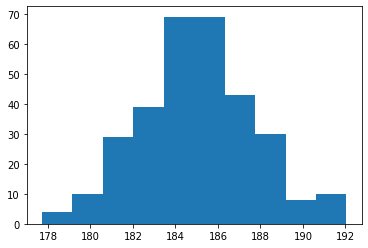

In [18]:
plt.hist(1/w_)
L = np.mean(1/w_)/2. # Debe ser la mitad de la longitud tipica
print(L)

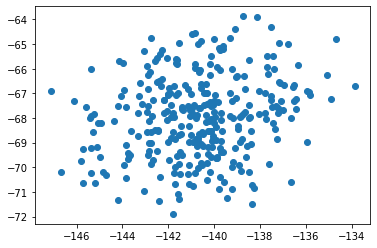

In [19]:
plt.scatter(xm,ym,marker='o')

In [20]:
def Prior(r,L = 100):
    return r**2*np.exp(-r/L)/(2*L**3)

def Likelihood(r,w0=0.004,sigmaw=0.06):
    return np.exp( -(w0 - 1./r)**2 /(2*sigmaw**2) )/sigmaw  

def Posterior(r,w0=0.004,sigmaw=0.06,L = 100):
    return Likelihood(r,w0,sigmaw)*Prior(r,L=L)

In [22]:
r = np.linspace(0.001,1000,1000) 
posterior = Posterior(r, w0=0.0042, L = L)
jj = np.where(posterior == np.amax(posterior))
print(r[jj],1/r[jj])

[185.186] [0.00539998]


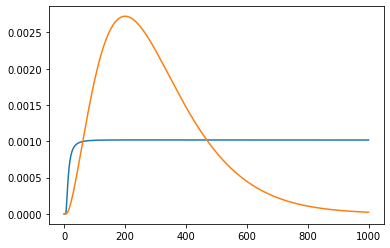

In [23]:
norm1 = integrate.quad(Likelihood,0.001,1000)[0]
norm2 = integrate.quad(Posterior,0.001,1000)[0]
plt.plot(r,Likelihood(r,w0=0.004)/norm1)
plt.plot(r,Posterior(r,0.004)/norm2)

In [24]:
def GetShift(w,sigmaw,L = 150):
    
    new_w = w.copy()
    
    r = np.linspace(0.001,1000,10000)
    
    for i in range(len(w)):
        posterior = Posterior(r,w[i],sigmaw[i],L=L)
        jj = np.where(posterior == np.amax(posterior))
        new_w[i] = 1/r[jj]
        
    return new_w

In [25]:
new_w = GetShift(w_,sigmaw_,L = L)

In [ ]:
for i in range(len(w_)):
    if i%20 == 0:
        print(w_[i],new_w[i])

In [27]:
d_fit = 1/new_w *u.pc

c1 = apycoords.SkyCoord(ra=ra,dec=dec,distance=d_fit,frame='icrs')
#print("(X,Y,Z) in (kpc,kpc,kpc)")
#print("\t",c.galactic.cartesian)
x1 = c1.galactic.cartesian.x
y1 = c1.galactic.cartesian.y
z1 = c1.galactic.cartesian.z

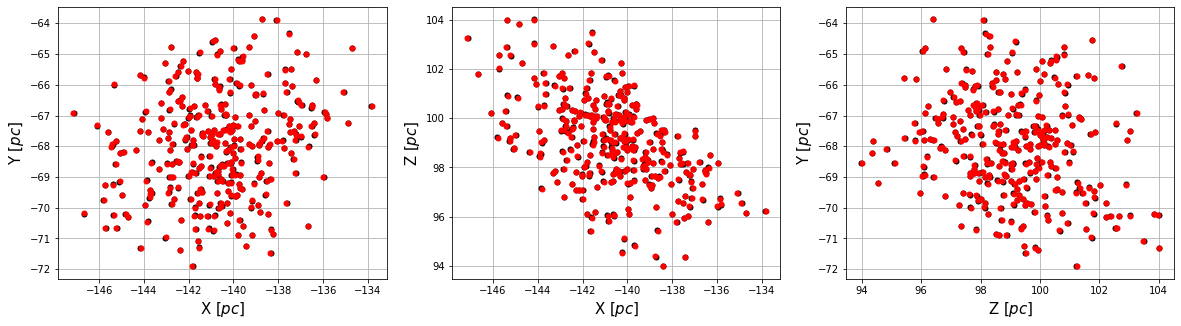

In [34]:
%matplotlib inline
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot(xm, ym,color='black',marker='o',linestyle='None',markersize=5,alpha=1)
plt.plot(x1, y1,color='red',marker='o',linestyle='None',markersize=5,alpha=1)
plt.xlabel("X $[pc]$", fontsize = 15)
plt.ylabel("Y $[pc]$", fontsize = 15)#,rotation=0)
plt.grid()

plt.subplot(1,3,2)
plt.plot(xm, zm,color='black',marker='o',linestyle='None',markersize=5,alpha=1)
plt.plot(x1, z1,color='red',marker='o',linestyle='None',markersize=5,alpha=1)
plt.xlabel("X $[pc]$", fontsize = 15)
plt.ylabel("Z $[pc]$", fontsize = 15)#,rotation=0)
plt.grid()

plt.subplot(1,3,3)
plt.plot(zm, ym,color='black',marker='o',linestyle='None',markersize=5,alpha=1)
plt.plot(z1, y1,color='red',marker='o',linestyle='None',markersize=5,alpha=1)
plt.xlabel("Z $[pc]$", fontsize = 15)
plt.ylabel("Y $[pc]$", fontsize = 15)#,rotation=0)
plt.grid()
#plt.savefig('./2d.jpg')
plt.show()